In [1]:
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive, FloatSlider, Checkbox, interact, Layout, interactive_output, FloatSlider
from qiskit import QuantumCircuit
from qiskit.visualization import plot_bloch_multivector, plot_bloch_vector
import qiskit.quantum_info as qi
from qiskit.visualization.utils import _bloch_multivector_data
from IPython.display import display

#from utils import print_statevector

In [2]:
x = np.linspace(0,1,100)
y = np.linspace(0,1,100)

x,y = np.meshgrid(x,y)

def f(A, B, C, D):
    return D*np.sin(C*np.sqrt(A**2+B**2))

def plotting(z=1, w=1):

    z = f(x,y,z,w)

    fig, axs = plt.subplots(1, 1, figsize=(16, 6))
    im1 = axs.imshow(z, cmap='hot', interpolation='bilinear', vmin=-5, vmax=5)
    axs.set_title('Magnitude')
    fig.colorbar(im1, ax=axs)
    
interactive_plot = interactive(plotting, z=(0,10,1), w=(1,5,1))
interactive_plot

interactive(children=(IntSlider(value=1, description='z', max=10), IntSlider(value=1, description='w', max=5, …

In [3]:
def plot_bloch(theta,phi):
    
    alpha = np.cos(theta/2)
    beta = np.exp(1j*phi)*np.sin(theta/2)
    
    sv = qi.Statevector([alpha,beta])
    
    bloch_data = _bloch_multivector_data(sv)

    width, height = plt.figaspect(1)
    figsize=(width, height)
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(1, 1, 1, projection='3d')

    plot_bloch_vector(bloch_data[0], "qubit " + str(0), ax=ax,
                      figsize=figsize)   
    
interactive_plot = interactive(plot_bloch, theta=(0,np.pi,np.pi/10), phi=(0,2*np.pi,np.pi/20))
interactive_plot

interactive(children=(FloatSlider(value=1.5707963267948966, description='theta', max=3.141592653589793, step=0…

In [4]:
def f(m, b):
    plt.figure(2)
    x = np.linspace(-10, 10, num=1000)
    plt.plot(x, m * x + b)
    plt.ylim(-5, 5)
    plt.show()

interactive_plot = interactive(f, m=(-2.0, 2.0), b=(-3, 3, 0.5))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='m', max=2.0, min=-2.0), FloatSlider(value=0.0, descr…

In [5]:
output.__dict__

{'_trait_values': {'_model_module': '@jupyter-widgets/output',
  '_model_module_version': '1.0.0',
  '_model_name': 'OutputModel',
  '_view_count': None,
  '_view_module': '@jupyter-widgets/output',
  '_view_module_version': '1.0.0',
  '_view_name': 'OutputView',
  'msg_id': '',
  'comm': <ipykernel.comm.comm.Comm at 0x7ffe49d02b90>,
  'keys': ['_dom_classes',
   '_model_module',
   '_model_module_version',
   '_model_name',
   '_view_count',
   '_view_module',
   '_view_module_version',
   '_view_name',
   'layout',
   'msg_id',
   'outputs'],
  '_dom_classes': (),
  'layout': Layout(height='350px'),
  'outputs': (),
  '_display_callbacks': <ipywidgets.widgets.widget.CallbackDispatcher at 0x7ffe49d02910>,
  '_property_lock': {}},
 '_trait_notifiers': {'comm': {'change': [<traitlets.traitlets.ObserveHandler at 0x7ffe4497df90>]}},
 '_trait_validators': {},
 '_cross_validation_lock': False,
 '_model_id': '635e67e40a9e4605b5cd00c1e4ed8557',
 '_Output__counter': 0}

In [6]:
def slow_function(i):
    print(int(i),list(x for x in range(int(i)) if
                str(x)==str(x)[::-1] and
                str(x**2)==str(x**2)[::-1]))
    return

interact(slow_function,i=FloatSlider(min=1e5, max=1e7, step=1e5, continuous_update=False));

interactive(children=(FloatSlider(value=100000.0, continuous_update=False, description='i', max=10000000.0, mi…

In [7]:
from ipywidgets import Button, HBox, VBox

words = ['correct', 'horse', 'battery', 'staple']
items = [Button(description=w) for w in words]
left_box = VBox([items[0], items[1]])
right_box = VBox([items[2], items[3]])
HBox([left_box, right_box])

In [8]:
def conditional_print(a, b):
    if a >= 0.5:
        print(b)

w = interactive(conditional_print, a=(-1,1,0.1), b=['a','b','c'])
w

interactive(children=(FloatSlider(value=0.0, description='a', max=1.0, min=-1.0), Dropdown(description='b', op…

In [9]:
x_widget = FloatSlider(min=0.0, max=10.0, step=0.05)
y_widget = FloatSlider(min=0.5, max=10.0, step=0.05, value=5.0)

def update_x_range(*args):
    x_widget.max = 2.0 * y_widget.value
y_widget.observe(update_x_range, 'value')

def printer(x, y):
    print(x, y)
interact(printer,x=x_widget, y=y_widget);

interactive(children=(FloatSlider(value=0.0, description='x', max=10.0, step=0.05), FloatSlider(value=5.0, des…

In [10]:
x_widget = FloatSlider(min=0.0, max=10.0, step=0.05)
y_widget = Checkbox(value=False,description='Disable?')

def update_x_disabled(*args):
    if y_widget.value == True:
        x_widget.disabled = True
    else:
         x_widget.disabled = False   
y_widget.observe(update_x_disabled, 'value')

def printer(x, y):
    print(x)
interact(printer,x=x_widget, y=y_widget);

interactive(children=(FloatSlider(value=0.0, description='x', max=10.0, step=0.05), Checkbox(value=False, desc…

In [11]:
def plot_function(amp=1,freq=1):

    t = np.linspace(0,64,64)
    i_sig = amp*np.sin(2*np.pi*freq*t)
    q_sig = amp/10*np.cos(2*np.pi*freq*t)
    
    fig, axs = plt.subplots(2, sharex=True)
    axs[1].set_xlabel('time')
    axs[0].set_ylabel('In-Phase Amplitude')
    axs[1].set_ylabel('Quadrature Amplitude')
    axs[0].set_ylim(-amp*1.1,amp*1.1)
    axs[1].set_ylim(-amp/10*1.1,amp/10*1.1)
    axs[0].step(t, i_sig, 'b')
    axs[1].step(t, q_sig, 'r')
    
widget=interactive(plot_function,amp=(1,10,1),freq=(1,5,1))
controls = HBox(widget.children[:-1], layout = Layout(flex_flow='row wrap'))
output = widget.children[-1]
display(VBox([controls, output]))

In [12]:
widget.children[:-1]

(IntSlider(value=1, description='amp', max=10, min=1),
 IntSlider(value=1, description='freq', max=5, min=1))

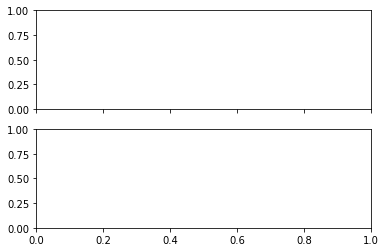

In [13]:
amp = FloatSlider(value=0.5,min=0.5,max=10,step=0.5)
freq = FloatSlider(value=0.1,min=0.0,max=10,step=1)
fig, axs = plt.subplots(2, sharex=True)

def plot_function(amp,freq):

    t = np.linspace(0,640,640)
    i_sig = amp*np.sin(2*np.pi*freq*t)
    q_sig = amp/10*np.cos(2*np.pi*freq*t)
    
    axs[1].set_xlabel('time')
    axs[0].set_ylabel('In-Phase Amplitude')
    axs[1].set_ylabel('Quadrature Amplitude')
    axs[0].set_ylim(-amp*1.1,amp*1.1)
    axs[1].set_ylim(-amp/10*1.1,amp/10*1.1)
    axs[0].step(t, i_sig, 'b')
    axs[1].step(t, q_sig, 'r')
    display(fig)
    
figure_out = interactive_output(plot_function,{'amp': amp, 'freq': freq})
controls = HBox([amp,freq], layout = Layout(flex_flow='row wrap'))

In [14]:
display(VBox([controls, figure_out]))

In [15]:
a = IntSlider()
b = IntSlider()
c = IntSlider()
ui = HBox([a, b, c])
def f(a, b, c):
    print((a, b, c))

out = interactive_output(f, {'a': a, 'b': b, 'c': c})

display(ui, out)

NameError: name 'IntSlider' is not defined

In [16]:
import ipywidgets as widgets

a = widgets.IntSlider(description="Delayed", continuous_update=False)
b = widgets.IntText(description="Delayed", continuous_update=False)
c = widgets.IntSlider(description="Continuous", continuous_update=True)
d = widgets.IntText(description="Continuous", continuous_update=True)

widgets.link((a, 'value'), (b, 'value'))
widgets.link((a, 'value'), (c, 'value'))
widgets.link((a, 'value'), (d, 'value'))
widgets.VBox([a,b,c,d])

In [17]:
def plot_wf(samples):
    
    amp = 1
    freq = 1
    
    print(samples)
    '''
    t = np.linspace(0,samples,samples)
    i_sig = amp*np.sin(2*np.pi*freq*t)
    q_sig = amp/10*np.cos(2*np.pi*freq*t)
    
    fig, axs = plt.subplots(2, sharex=True)
    axs[1].set_xlabel('time')
    axs[0].set_ylabel('In-Phase Amplitude')
    axs[1].set_ylabel('Quadrature Amplitude')
    axs[0].set_xlim(0,samples)
    axs[0].set_ylim(-amp*1.1,amp*1.1)
    axs[1].set_ylim(-amp/10*1.1,amp/10*1.1)
    axs[0].step(t, i_sig, 'b')
    axs[1].step(t, q_sig, 'r')
    '''

In [18]:
import ipywidgets as widgets

# UI Top Pannel Waveform Control
samples_sldr = widgets.IntSlider(value=640, 
                                 description='Samples:', 
                                 min=10, max=6400)

top_panel = widgets.VBox([samples_sldr])


fig_out = widgets.interactive_output(plot_wf, 
                                     {'samples':samples_sldr})

right_panel = widgets.VBox([top_panel,fig_out])

display(widgets.HBox([right_panel]))

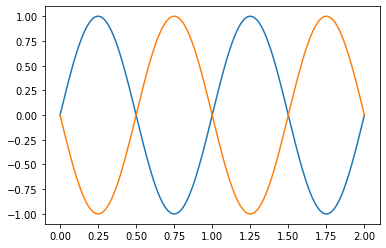

In [19]:
time = np.linspace(0,2,1001)
sig1 = np.sin(2*np.pi*time)
sig2 = np.sin(2*np.pi*time+np.pi)
plt.plot(time,sig1,time,sig2)

In [20]:
def plotty(sig):
    
    t = np.linspace(0,sig.size,sig.size)
    
    fig, axs = plt.subplots(2, sharex=True)
    axs[1].set_xlabel('time')
    axs[0].set_ylabel('In-Phase Amplitude')
    axs[1].set_ylabel('Quadrature Amplitude')
    axs[0].step(t, sig, 'b')
    axs[1].step(t, 2*sig, 'r')

In [21]:
def up_func(amp, freq, sig, check):
    t = np.linspace(0,sig.size,sig.size)
    if check == True:
        sig = amp*np.sin(2*np.pi*freq*t)
    else:
        sig = amp*np.ones(t.size)
    return sig

In [22]:
import ipywidgets as widgets

samps = 1001

amp = widgets.IntSlider(value=1)
freq = widgets.IntSlider(value=1)
sig = widgets.fixed(np.ones(samps))
check = widgets.Checkbox(value=False)

def update_sig(*args):
    sig.value = up_func(amp.value,freq.value,sig.value,check.value)
        
amp.observe(update_sig, 'value')
freq.observe(update_sig, 'value')
check.observe(update_sig, 'value')

figure_out = interactive_output(plotty,{'sig':sig})
display(figure_out, amp, freq, check)

Output()

IntSlider(value=1)

IntSlider(value=1)

Checkbox(value=False)

In [ ]:
check.value

In [23]:
from ipywidgets import Text, HBox
t1=Text(description='t1',continuous_update=False)
t2=Text(description='t2',continuous_update=False)
result1,result2 = [],[]

def on_text(change):
    n=change['owner'].description
    exec('result'+n[1:]+'.append(change["new"])') # could be generalized for any name of the kind
    # [string+str(k) for k in range(kk)],  implying kk similarText widgets displayed in the page
    print('result1 = {}\nresult2 = {}'.format(result1,result2)) 
    # print('n = {}, change["new"] = {}'.format(n,change['new']))
t1.observe(on_text,'value',type= 'change')
t2.observe(on_text,'value',type= 'change')
h = HBox([t1,t2])
h

result1 = ['hello']
result2 = []
result1 = ['hello']
result2 = ['hi']


In [28]:
t1.value

'hello'

In [33]:
import ipywidgets as widgets
shiftfreq_input_fltxt = widgets.BoundedFloatText(value=4.9, min=0.0, max=5.5, step=0.001,
                                                          layout=widgets.Layout(width='245px'),
                                                          description='Freq [GHz]:',
                                                          disabled=False)

h = widgets.HBox([shiftfreq_input_fltxt])
h

In [35]:
shiftfreq_input_fltxt.value

4.8